# **barcode_analyzer**


Python script to plot a profile (Sanger-sequencing-like) of the nucleotides present in barcodes.
Frequency of each barcode is taken into account to draw the graph.

For additional details, please refer to the GitHub repository: https://github.com/RTlabCBM/FidelityFinder

In [ ]:
#@markdown # Upload your json file with the barcodes found and their frequency

#@markdown  Input file must be a JSON file containing barcodes as keys and their corresponding frequencies as values.
#@markdown  All barcodes are expected to have the same length. If they do not, they can be filtered using the provided barcode_length parameter.
#@markdown  JSON content example:
#@markdown
#@markdown {"CGGTCTGACAACTA": 4, "ACAAACTTTTATCA": 5, "TGAATCTGGTACTA": 8}

from google.colab import files
uploaded = files.upload()
input_file=list(uploaded.keys())[0]

Saving NGS_HN00197651_cov2_BH10ala8BIO_barcodes.json to NGS_HN00197651_cov2_BH10ala8BIO_barcodes.json


In [ ]:
#@markdown # Input parameters
output_prefix = "sample_name" #@param {type:"string"}
barcode_length = 14 #@param {type:"number"}

	Step 1 => Parameters catching
	Step 1 done

	Step 2 => Open & read input file
	Step 2 done

	Step 3 => Filtering right barcodes sizes
	Step 3 done

	Step 4 => Normalizing frequencies values
	Step 4 done

	Step 5 => Extracting data
	Step 5 done

	Step 6 => Drawing plot
	Step 6 done



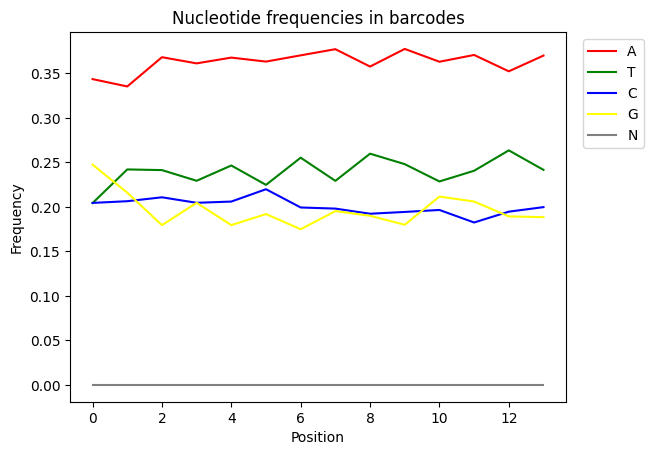

In [ ]:
#@markdown # Main program
__file__ = "main_program"




# encoding:UTF-8

########################################################################################

__doc__ = """
SYNOPSIS

 Python script to plot a profile (Sanger-sequencing-like) of the nucleotides present in barcodes.
 Frequency of each barcode is taken into account to draw the graph.

 This script is an adaptation of the original program to be run on Google Colab.

DESCRIPTION

 Parameters. These variables are needed:

    input_file		      file
    output_prefix		    output prefix
    barcode_length	    length of the barcodes


 Input file:
 Input file must be a JSON file containing barcodes as keys and their corresponding frequencies as values.
 All barcodes are expected to have the same length. If they do not, they can be filtered using the provided barcode_length parameter.
 JSON content example:
    {"ATGTGCT": 4, "ATGTGTA": 2, ...}

AUTHORS

    Javier Martinez del Río (javier.martinez@cbm.csic.es; javier.mardelrio@gmail.com)

"""

__version__ = 'v1.0.0'




## Imports
##----------
import sys, os
import json
import matplotlib.pyplot as plt
%matplotlib inline


## Functions
##----------

def send_error_message(message):
    """Gives an error message"""
    print("\n\t########## ERROR ########## \n{}\n".format(message))
    sys.exit(1)

def filter_barcodes_by_length(barcodes_dic, barcode_length):
    """
    Filter barcodes in the given dictionary by length.

    Parameters:
        barcodes_dic (dict): Dictionary where keys are barcodes and values are their frequencies.
        barcode_length (int): Desired length for the barcodes.

    Returns:
        dict: Filtered dictionary containing only barcodes with the specified length.
    """
    try:
        filtered_barcodes_dic = {}
        for barcode, frequency in barcodes_dic.items():
            if len(barcode) == barcode_length:
                filtered_barcodes_dic[barcode] = frequency
        return filtered_barcodes_dic
    except Exception as error:
        send_error_message(f'It was not possible to filter the right barcode lengths. Error: \n{error}')




## Main program
##-------------



## Step 1: Parameters catching
##--------------------

print("\tStep 1 => Parameters catching")

barcodes_file = input_file

print("\tStep 1 done\n")



## Step 2: Open & read input file
##--------------------

print("\tStep 2 => Open & read input file")

try:
    with open(input_file, 'r') as file:
        barcodes_dic = json.load(file)
except Exception as error:
    send_error_message(f' There was an error when trying to open the input file of {__file__} for the sample {output_prefix}: \n{error}')

if len(barcodes_dic.keys()) < 1:
  send_error_message(f' No barcodes could be found, please check that the input file follows the format required and has at least one barcode')

print("\tStep 2 done\n")




## Step 3: Filtering right barcodes sizes
##--------------------

print("\tStep 3 => Filtering right barcodes sizes")

barcodes_dic = filter_barcodes_by_length(barcodes_dic, barcode_length)

if len(barcodes_dic.keys()) < 1:
  send_error_message(f'No barcodes could be found after filtering. Please ensure that "barcode_length" has the correct value')

print("\tStep 3 done\n")



## Step 4: Normalizing frequencies values
##--------------------

print("\tStep 4 => Normalizing frequencies values")

total_barcodes = sum(barcodes_dic.values())
barcodes_dic_normalized={}
for barcode, freq in barcodes_dic.items():
  barcodes_dic_normalized[barcode] = freq/total_barcodes

print("\tStep 4 done\n")



## Step 5: Extracting data
##--------------------

print("\tStep 5 => Extracting data")

# Create a dictionary to store nucleotide frequencies for each position
positions_dic={pos: [0,0,0,0,0] for pos in range(barcode_length)}
for barcode, normalized_freq in barcodes_dic_normalized.items():
  for pos, nucleotide in enumerate(barcode):
    nucleotide = nucleotide.upper()
    if nucleotide == "A":
      positions_dic[pos][0] += normalized_freq
    elif nucleotide == "T":
      positions_dic[pos][1] += normalized_freq
    elif nucleotide == "C":
      positions_dic[pos][2] += normalized_freq
    elif nucleotide == "G":
      positions_dic[pos][3] += normalized_freq
    else:
      positions_dic[pos][4] += normalized_freq

# Extract individual nucleotide frequency lists from positions_dic
A = [positions_dic[pos][0] for pos in range(len(positions_dic))]
T = [positions_dic[pos][1] for pos in range(len(positions_dic))]
C = [positions_dic[pos][2] for pos in range(len(positions_dic))]
G = [positions_dic[pos][3] for pos in range(len(positions_dic))]
N = [positions_dic[pos][4] for pos in range(len(positions_dic))]

print("\tStep 5 done\n")




## Step 6: Drawing plot
##--------------------

print("\tStep 6 => Drawing plot")

plot_file = output_prefix + ".png"
plt.plot(list(positions_dic.keys()), A, label='A', linestyle='-', color='red', marker=None)
plt.plot(list(positions_dic.keys()), T, label='T', linestyle='-', color='green', marker=None)
plt.plot(list(positions_dic.keys()), C, label='C', linestyle='-', color='blue', marker=None)
plt.plot(list(positions_dic.keys()), G, label='G', linestyle='-', color='yellow', marker=None)
plt.plot(list(positions_dic.keys()), N, label='N', linestyle='-', color='gray', marker=None)
plt.title('Nucleotide frequencies in barcodes')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig(plot_file, bbox_inches='tight')

print("\tStep 6 done\n")

In [ ]:
#@markdown # Download files
files.download(plot_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Extra content

	Step 1 => Parameters catching
	Step 1 done

	Step 2 => Open & read input file
	Step 2 done

	Step 3 => Filtering right barcodes sizes
	Step 3 done

	Step 3.2 => Change all barcode frequencies to 1
	Step 3.2 done

	Step 4 => Normalizing frequencies values
	Step 4 done

	Step 5 => Extracting data
	Step 5 done

	Step 6 => Drawing plot
	Step 6 done



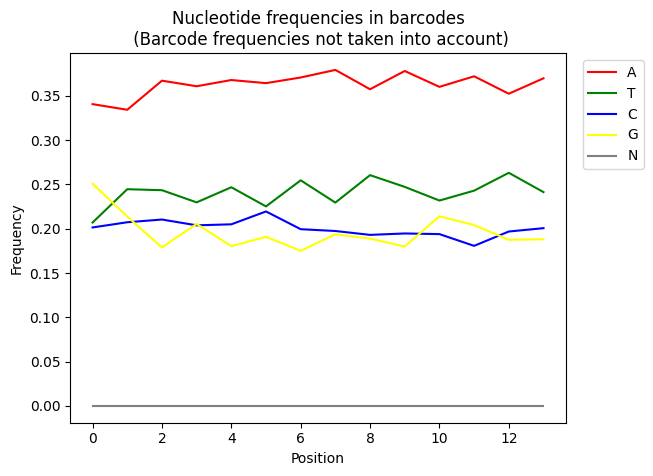

In [ ]:
#@markdown # Main program (not taking into account barcodes' frequencies)
__file__ = "main_program"




# encoding:UTF-8

########################################################################################

__doc__ = """
SYNOPSIS

 Python script to plot a profile (Sanger-sequencing-like) of the nucleotides present in barcodes.
 Frequency of each barcode is NOT taken into account to draw the graph.

 This script is an adaptation of the original program to be run on Google Colab.

DESCRIPTION

 Parameters. These variables are needed:

    input_file		      file
    output_prefix		    output prefix
    barcode_length	    length of the barcodes


 Input file:
 Input file must be a JSON file containing barcodes as keys and their corresponding frequencies as values.
 All barcodes are expected to have the same length. If they do not, they can be filtered using the provided barcode_length parameter.
 JSON content example:
    {"ATGTGCT": 4, "ATGTGTA": 2, ...}

AUTHORS

    Javier Martinez del Río (javier.martinez@cbm.csic.es)

"""

__version__ = 'v1.0.0'




## Imports
##----------
import sys, os
import json
import matplotlib.pyplot as plt
%matplotlib inline


## Functions
##----------

def send_error_message(message):
    """Gives an error message"""
    print("\n\t########## ERROR ########## \n{}\n".format(message))
    sys.exit(1)

def filter_barcodes_by_length(barcodes_dic, barcode_length):
    """
    Filter barcodes in the given dictionary by length.

    Parameters:
        barcodes_dic (dict): Dictionary where keys are barcodes and values are their frequencies.
        barcode_length (int): Desired length for the barcodes.

    Returns:
        dict: Filtered dictionary containing only barcodes with the specified length.
    """
    try:
        filtered_barcodes_dic = {}
        for barcode, frequency in barcodes_dic.items():
            if len(barcode) == barcode_length:
                filtered_barcodes_dic[barcode] = frequency
        return filtered_barcodes_dic
    except Exception as error:
        send_error_message(f'It was not possible to filter the right barcode lengths. Error: \n{error}')




## Main program
##-------------



## Step 1: Parameters catching
##--------------------

print("\tStep 1 => Parameters catching")

barcodes_file = input_file

print("\tStep 1 done\n")



## Step 2: Open & read input file
##--------------------

print("\tStep 2 => Open & read input file")

try:
    with open(input_file, 'r') as file:
        barcodes_dic = json.load(file)
except Exception as error:
    send_error_message(f' There was an error when trying to open the input file of {__file__} for the sample {output_prefix}: \n{error}')

if len(barcodes_dic.keys()) < 1:
  send_error_message(f' No barcodes could be found, please check that the input file follows the format required and has at least one barcode')

print("\tStep 2 done\n")




## Step 3: Filtering right barcodes sizes
##--------------------

print("\tStep 3 => Filtering right barcodes sizes")

barcodes_dic = filter_barcodes_by_length(barcodes_dic, barcode_length)

if len(barcodes_dic.keys()) < 1:
  send_error_message(f'No barcodes could be found after filtering. Please ensure that "barcode_length" has the correct value')

print("\tStep 3 done\n")


## Step 3.2: Change all barcode frequencies to 1
##--------------------
print("\tStep 3.2 => Change all barcode frequencies to 1")
for key in barcodes_dic:
    barcodes_dic[key] = 1
print("\tStep 3.2 done\n")

## Step 4: Normalizing frequencies values
##--------------------

print("\tStep 4 => Normalizing frequencies values")

total_barcodes = sum(barcodes_dic.values())
barcodes_dic_normalized={}
for barcode, freq in barcodes_dic.items():
  barcodes_dic_normalized[barcode] = freq/total_barcodes

print("\tStep 4 done\n")



## Step 5: Extracting data
##--------------------

print("\tStep 5 => Extracting data")

# Create a dictionary to store nucleotide frequencies for each position
positions_dic={pos: [0,0,0,0,0] for pos in range(barcode_length)}
for barcode, normalized_freq in barcodes_dic_normalized.items():
  for pos, nucleotide in enumerate(barcode):
    nucleotide = nucleotide.upper()
    if nucleotide == "A":
      positions_dic[pos][0] += normalized_freq
    elif nucleotide == "T":
      positions_dic[pos][1] += normalized_freq
    elif nucleotide == "C":
      positions_dic[pos][2] += normalized_freq
    elif nucleotide == "G":
      positions_dic[pos][3] += normalized_freq
    else:
      positions_dic[pos][4] += normalized_freq

# Extract individual nucleotide frequency lists from positions_dic
A = [positions_dic[pos][0] for pos in range(len(positions_dic))]
T = [positions_dic[pos][1] for pos in range(len(positions_dic))]
C = [positions_dic[pos][2] for pos in range(len(positions_dic))]
G = [positions_dic[pos][3] for pos in range(len(positions_dic))]
N = [positions_dic[pos][4] for pos in range(len(positions_dic))]

print("\tStep 5 done\n")




## Step 6: Drawing plot
##--------------------

print("\tStep 6 => Drawing plot")

plot_file2 = output_prefix + "_no_normalization.png"
plt.plot(list(positions_dic.keys()), A, label='A', linestyle='-', color='red', marker=None)
plt.plot(list(positions_dic.keys()), T, label='T', linestyle='-', color='green', marker=None)
plt.plot(list(positions_dic.keys()), C, label='C', linestyle='-', color='blue', marker=None)
plt.plot(list(positions_dic.keys()), G, label='G', linestyle='-', color='yellow', marker=None)
plt.plot(list(positions_dic.keys()), N, label='N', linestyle='-', color='gray', marker=None)
plt.title('Nucleotide frequencies in barcodes\n (Barcode frequencies not taken into account)')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.savefig(plot_file2, bbox_inches='tight')

print("\tStep 6 done\n")

In [ ]:
#@markdown # Download files
files.download(plot_file2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>